Movie recommendation system.
The dataset is composed by ID,movie and genres

In [ ]:
import pandas as pd
uri_movies = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
movies = pd.read_csv(uri_movies)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
genre  = movies.genres.str.get_dummies()

In [ ]:
moviesData = pd.concat([movies,genre], axis = 1)
moviesData.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
# escalando os dados p saber quais generos sãão mais importantes para classificar

scaler = StandardScaler()
scalledGenres = scaler.fit_transform(genre)
scalledGenres



array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

Criando um modelo para  o agrupamento (clusterização)

In [ ]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters = 3)

modelo.fit(scalledGenres)

print('Grupos: {}' .format(modelo.labels_))


Grupos: [2 2 1 ... 0 2 1]


In [ ]:
print(modelo.cluster_centers_)


[[ 0.05601107 -0.0231024  -0.30327147 -0.2380774  -0.25063117 -0.75764433
   0.16421232  0.1663967   0.37067469 -0.18136906  0.08559515  0.1885166
  -0.08885294 -0.11484959  0.16696676 -0.11765701 -0.02290308  0.33065992
   0.09444084  0.04033354]
 [-0.05917995 -0.29277764 -0.28671624 -0.20493604 -0.1405902   1.215108
  -0.13388513 -0.16058    -0.30729069 -0.14957126 -0.09170457 -0.1807852
  -0.12120005  0.11134873 -0.19202903  0.30405661 -0.22966092 -0.42004787
  -0.11771374 -0.05035545]
 [-0.05917995  0.75281401  1.71470934  1.29983737  1.19579447 -0.15159815
  -0.26448275 -0.2107874  -0.58536363  0.97518254 -0.08752863 -0.24142967
   0.58780036  0.14430857 -0.14055173 -0.28845754  0.60717533 -0.18705283
  -0.05860895 -0.02484091]]


visualizando melhor a pontuação dada pela clusterização:

In [ ]:
groups = pd.DataFrame(modelo.cluster_centers_,
             columns=genre.columns)
groups

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.056011,-0.023102,-0.303271,-0.238077,-0.250631,-0.757644,0.164212,0.166397,0.370675,-0.181369,0.085595,0.188517,-0.088853,-0.114850,0.166967,-0.117657,-0.022903,0.330660,0.094441,0.040334
1,-0.059180,-0.292778,-0.286716,-0.204936,-0.140590,1.215108,-0.133885,-0.160580,-0.307291,-0.149571,-0.091705,-0.180785,-0.121200,0.111349,-0.192029,0.304057,-0.229661,-0.420048,-0.117714,-0.050355
2,-0.059180,0.752814,1.714709,1.299837,1.195794,-0.151598,-0.264483,-0.210787,-0.585364,0.975183,-0.087529,-0.241430,0.587800,0.144309,-0.140552,-0.288458,0.607175,-0.187053,-0.058609,-0.024841


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff61723de10>,
      dtype=object)

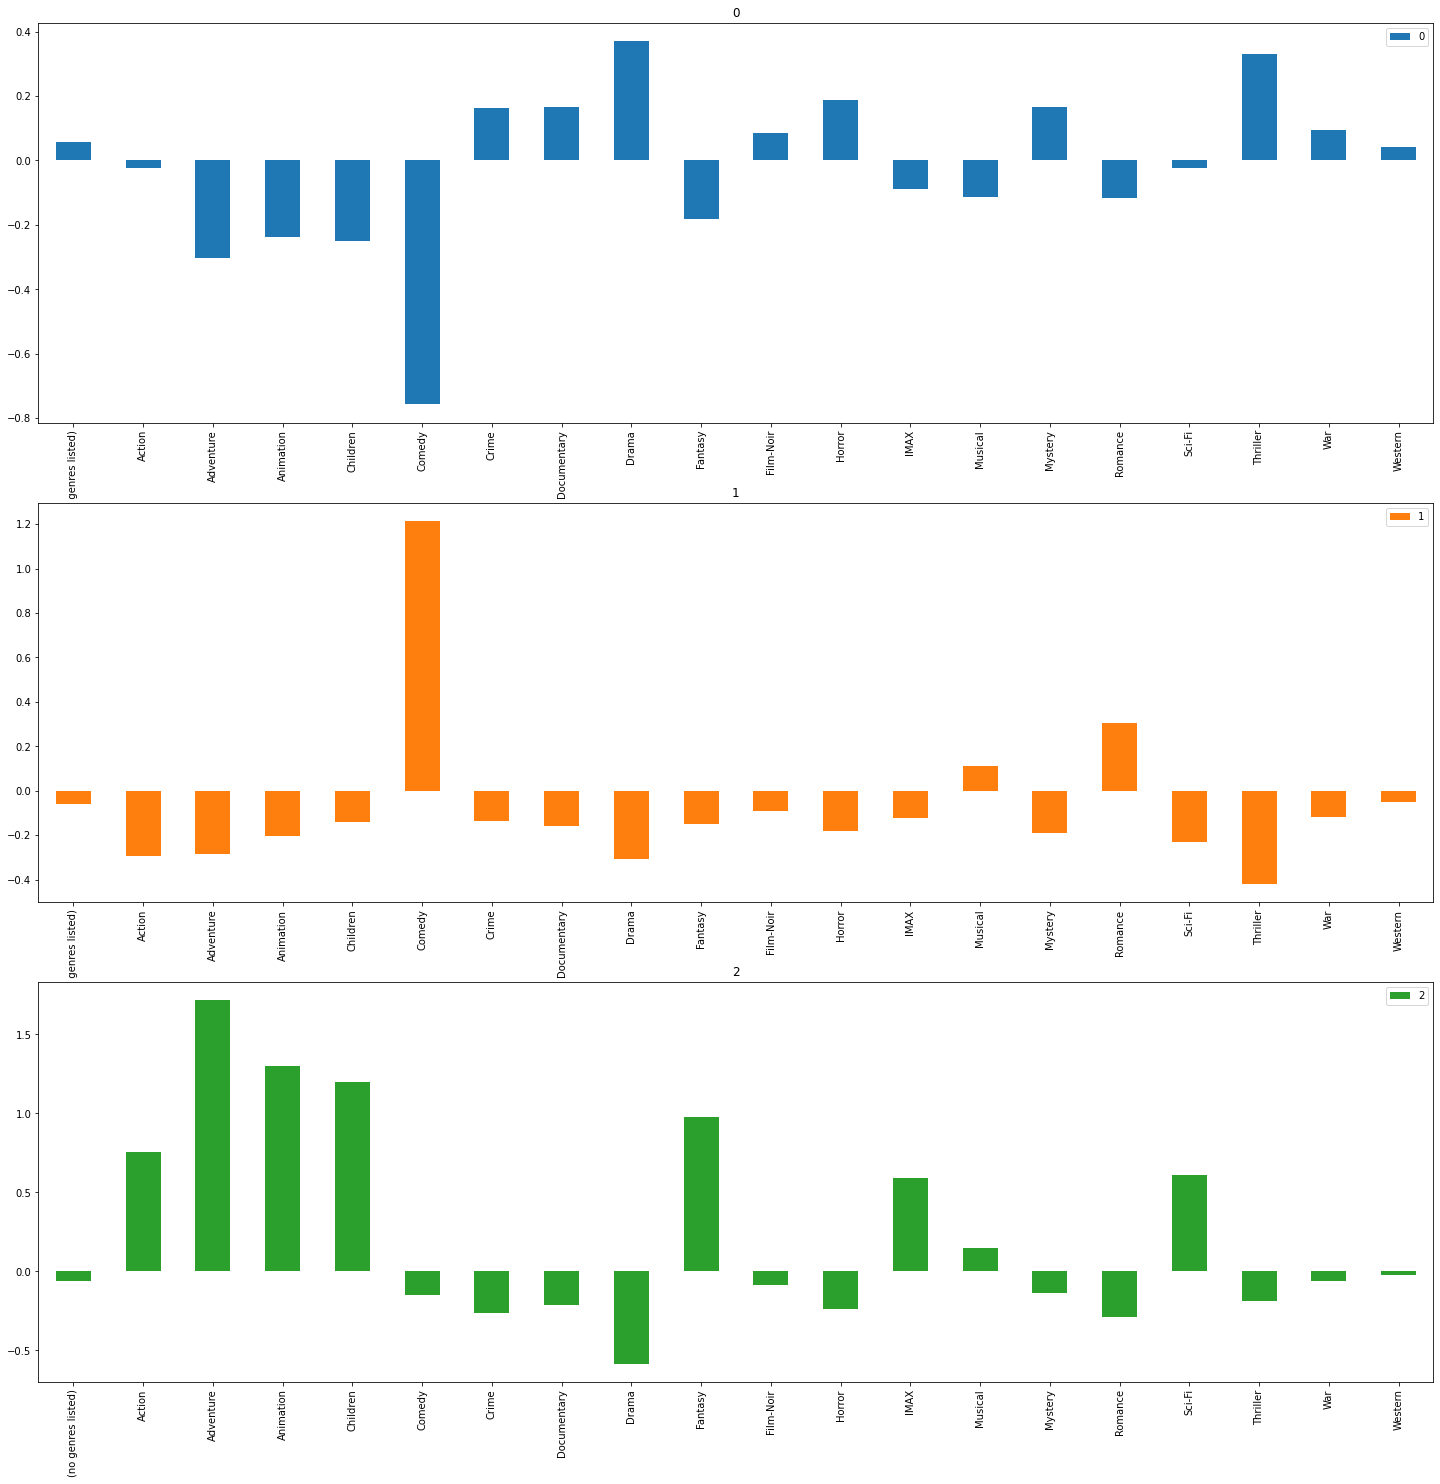

In [ ]:
groups.transpose().plot.bar(subplots =True,figsize=(25,25), sharex=False)

Filtro para fazer a recomendação:


In [ ]:
Grupo = 0
filtro = modelo.labels_ == Grupo
moviesData[filtro].sample(7)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5924,33838,Rize (2005),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8951,136654,The Face of an Angel (2015),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4926,7386,"Ten Commandments, The (1956)",Adventure|Drama,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6370,49917,When the Levees Broke: A Requiem in Four Acts ...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8539,115170,"Judge, The (2014)",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3549,4857,Fiddler on the Roof (1971),Drama|Musical,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1082,1406,La Cérémonie (1995),Crime|Drama|Mystery|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0


Plotando o grááfico. O problema éé que temos 20 dimensões (colunas). Então vamos reduzir para vizualizar (vamos usar o TSNE, que éé muito util para visualização de dados) 

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
visual =  tsne.fit_transform(scalledGenres)
visual

array([[ -7.9329767,  63.379845 ],
       [ 53.990814 , -22.660162 ],
       [-16.3073   , -28.681137 ],
       ...,
       [-22.326159 ,   3.9980001],
       [ 48.700844 ,  25.459478 ],
       [ 14.772247 , -14.204583 ]], dtype=float32)

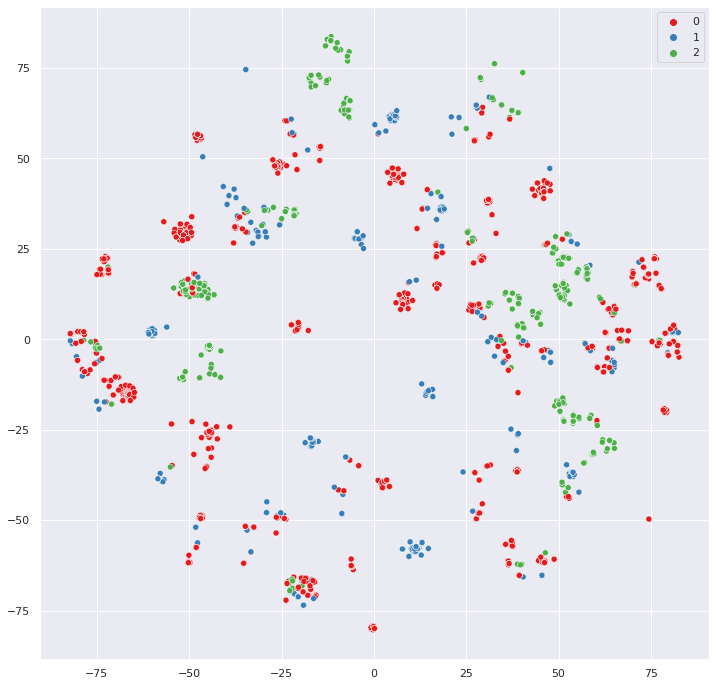

In [19]:
import seaborn as sns 

# sóó aumentando o tamanho do plot
sns.set(rc={'figure.figsize': (12,12)})

sns.scatterplot(x = visual[:,0],
                y = visual[:,1], hue=modelo.labels_,
                palette= sns.color_palette("Set1", 3))

No caso.... como reduzimos a dimensionalidade, perdemos informaçõões, entãão o grááfico ficou dessa forma, um pouco confuso e tudo bagunçado